# Stroke Prognosis

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>

## Análisis exploratorio de los datos

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sklearn as sk
import yellowbrick as yb

In [2]:
# Importación de datos
dataset = pd.read_csv("all-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Revisión de valores únicos por columna
cols = dataset.columns.tolist()
for col in cols:
    print(f"{col}: {dataset[col].unique()}")

id: [ 9046 51676 31112 ... 19723 37544 44679]
gender: ['Male' 'Female' 'Other']
age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.

In [4]:
# Formateo de los datos
dataset.drop("id", axis=1, inplace=True)
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 4, 'Self-employed': 2, 'Govt_job': 3, 'children': 1, 'Never_worked': 0})
dataset['Residence_type'] = dataset['Residence_type'].map({'Rural': 0, 'Urban': 1})
dataset['smoking_status'] = dataset['smoking_status'].map({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,4,1,228.69,36.6,2,1
1,0,61.0,0,0,1,2,0,202.21,NaN,1,1
2,1,80.0,0,1,1,4,0,105.92,32.5,1,1
3,0,49.0,0,0,1,4,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,1,1


In [5]:
# Analisis de missing values
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Eliminar filas con valores perdidos
dataset = dataset.dropna()
print(dataset.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
# Revisión de duplicados
print(dataset.duplicated().sum())

0


In [8]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,3.127928,0.507232,105.305150,28.893237,1.168670,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.140824,0.499999,44.424341,7.854067,1.022201,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,4.000000,1.000000,91.680000,28.100000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,4.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [9]:
# Revisión de tipos de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


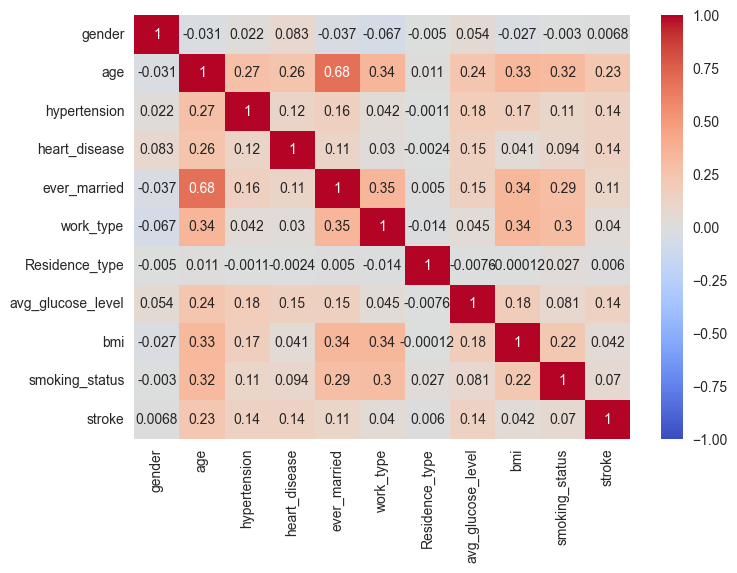

In [47]:
# Revisión de la corralación entre variables
numeric_df = dataset.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.show()

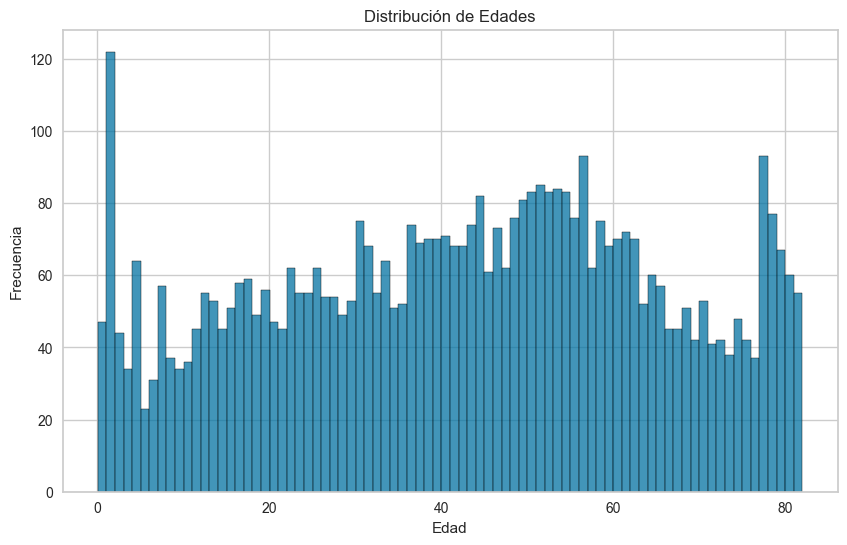

In [11]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(dataset['age'], bins=82)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

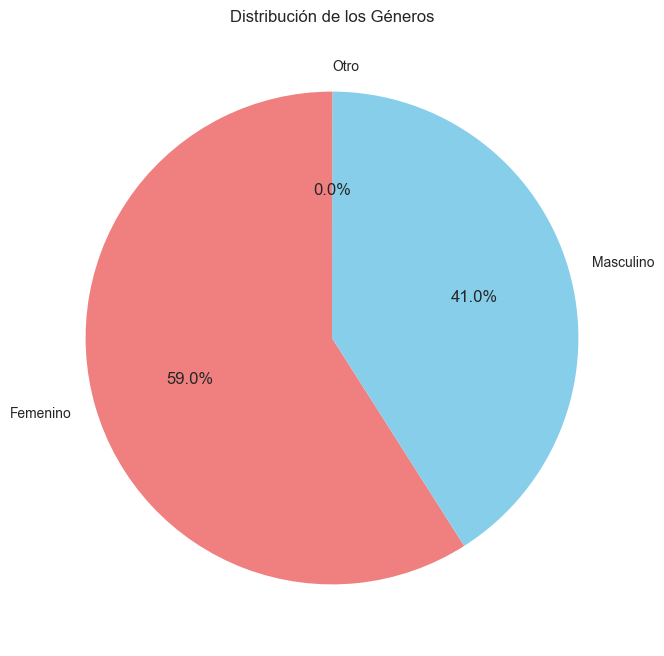

In [12]:
# Revisión de la distribución de los géneros
gender_counts = dataset['gender'].value_counts()
gender_labels = ['Masculino' if gender == 1 else 'Femenino' if gender == 0 else 'Otro' for gender in gender_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución de los Géneros')
plt.show()

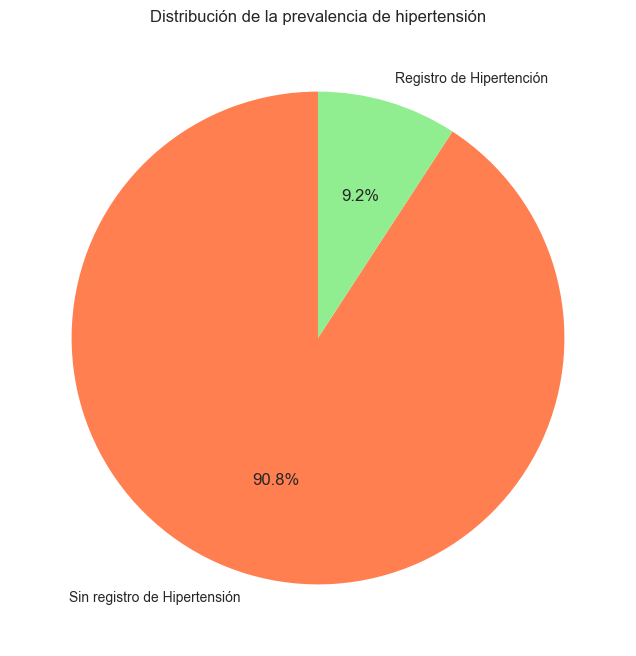

In [13]:
# Revisión de la distribución de la hipertensión
hipertension_counts = dataset['hypertension'].value_counts()
hipertension_labels = ['Registro de Hipertención' if hipertension == 1 else 'Sin registro de Hipertensión' for hipertension in hipertension_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(hipertension_counts, labels=hipertension_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de hipertensión')
plt.show()

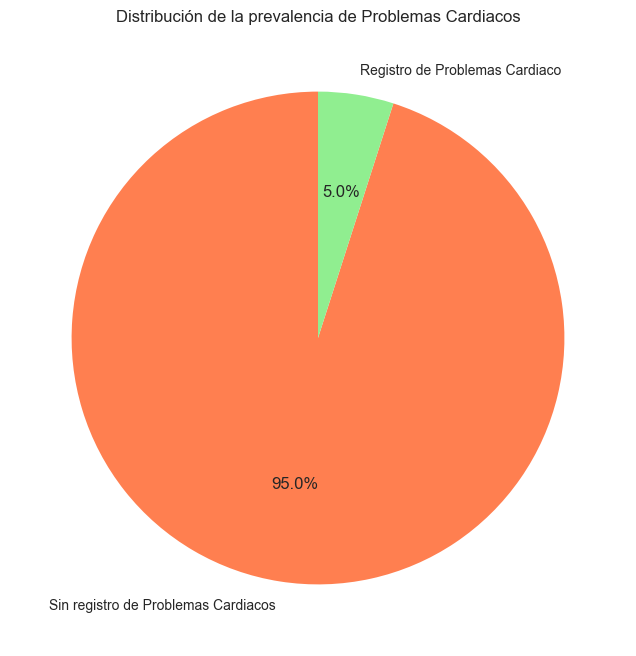

In [14]:
# Revisión de la distribución de los problemas cardiacos
heart_disease_counts = dataset['heart_disease'].value_counts()
heart_disease_labels = ['Registro de Problemas Cardiaco' if heart_disease == 1 else 'Sin registro de Problemas Cardiacos' for heart_disease in heart_disease_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de la prevalencia de Problemas Cardiacos')
plt.show()

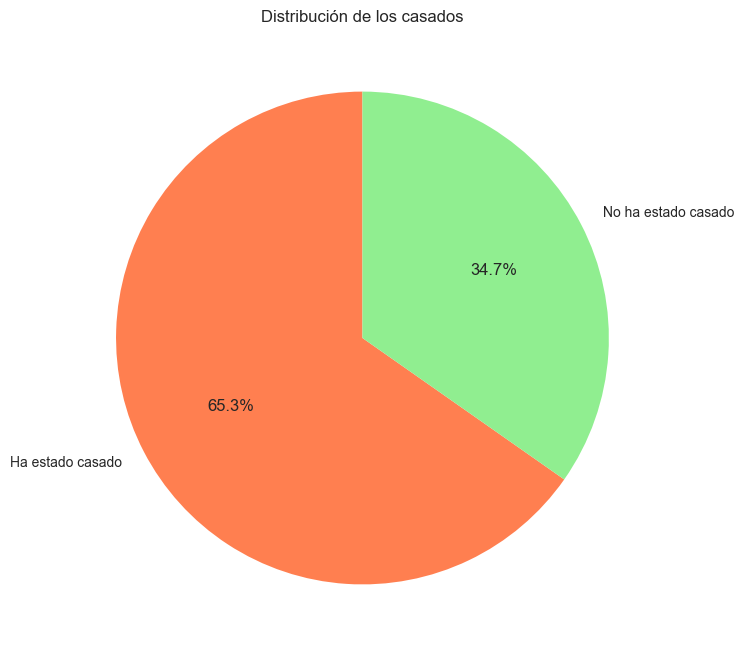

In [15]:
# Revisión de la distribución de los casados
ever_married_counts = dataset['ever_married'].value_counts()
ever_married_labels = ['Ha estado casado' if ever_married == 1 else 'No ha estado casado' for ever_married in ever_married_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(ever_married_counts, labels=ever_married_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de los casados')
plt.show()

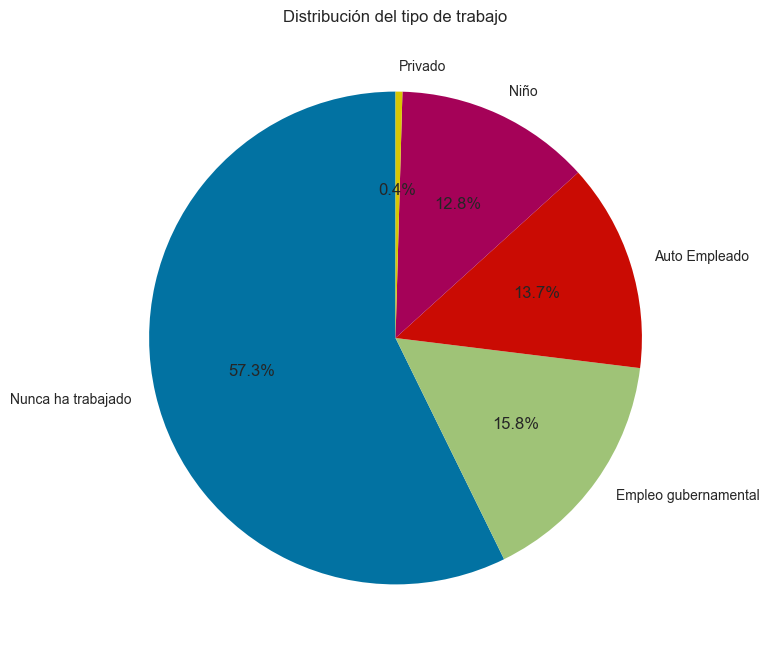

In [16]:
# Revisión del tipo de histología del tipo de trabajo
work_type_counts = dataset['work_type'].value_counts()
work_type_labels = ['Privado' if work_type == 0 else 'Auto Empleado' if work_type == 1 else 'Empleo gubernamental' if work_type == 2 else 'Niño' if work_type == 3 else 'Nunca ha trabajado' for work_type in work_type_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del tipo de trabajo')
plt.show()

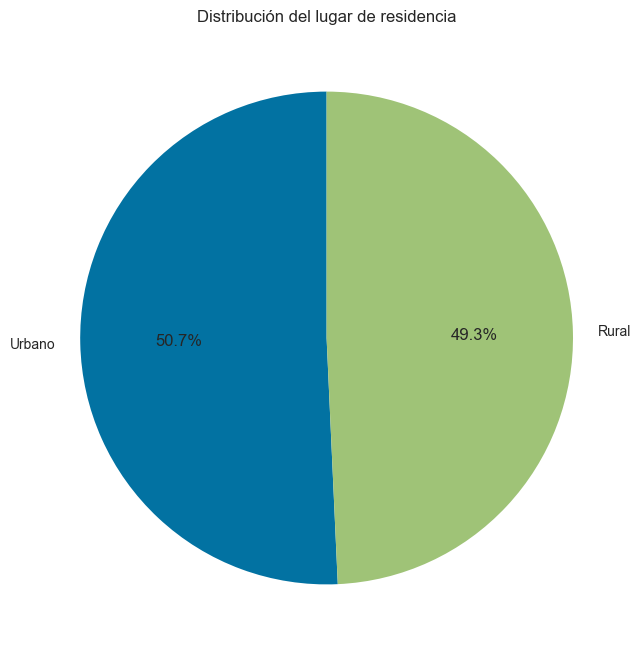

In [17]:
# Revisión de la distribución del lugar donde vive
Residence_type_counts = dataset['Residence_type'].value_counts()
Residence_type_labels = ['Rural' if Residence_type == 0 else 'Urbano' for Residence_type in Residence_type_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(Residence_type_counts, labels=Residence_type_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del lugar de residencia')
plt.show()

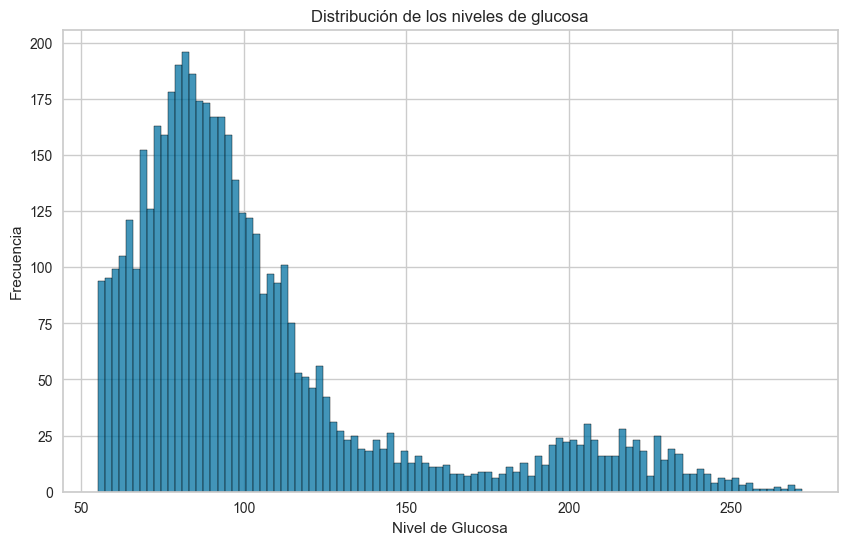

In [18]:
#Revisión de la distribución de los niveles de glucosa
plt.figure(figsize=(10, 6))
sns.histplot(dataset['avg_glucose_level'], bins=100)
plt.title('Distribución de los niveles de glucosa')
plt.xlabel('Nivel de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

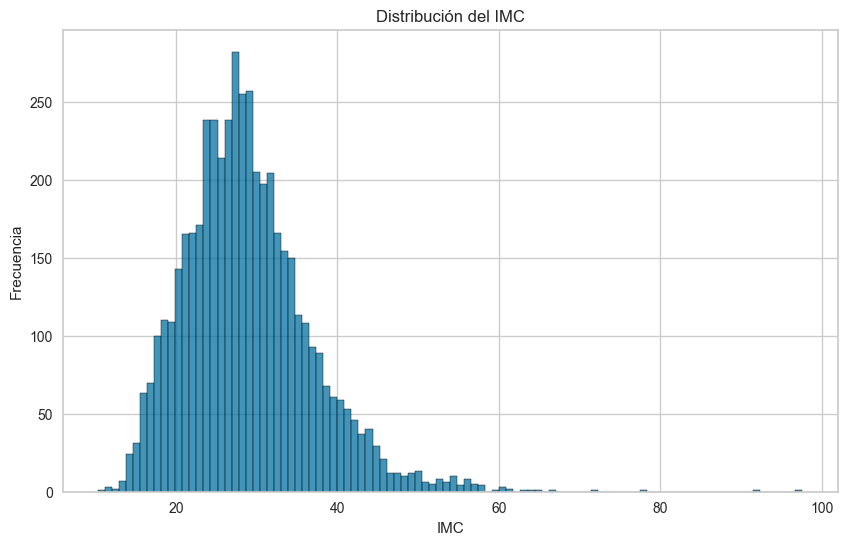

In [19]:
# Revisión de la distribución del IMC
plt.figure(figsize=(10, 6))
sns.histplot(dataset['bmi'], bins=100)
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

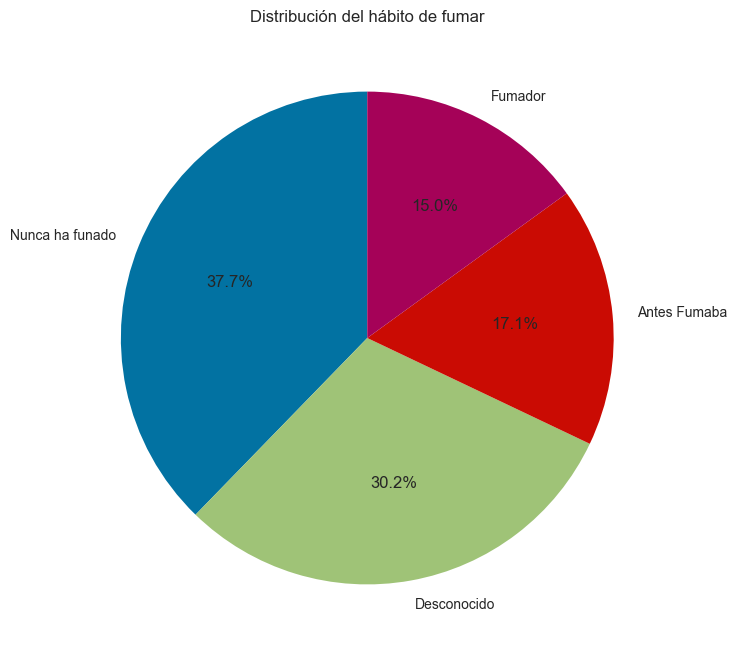

In [20]:
# Revisión de la distribución del hábito de fumar
smoking_status_counts = dataset['smoking_status'].value_counts()
smoking_status_labels = ['Desconocido' if smoking_status == 0 else 'Nunca ha funado' if smoking_status == 1 else 'Antes Fumaba' if smoking_status == 2 else 'Fumador' for smoking_status in smoking_status_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(smoking_status_counts, labels=smoking_status_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del hábito de fumar')
plt.show()

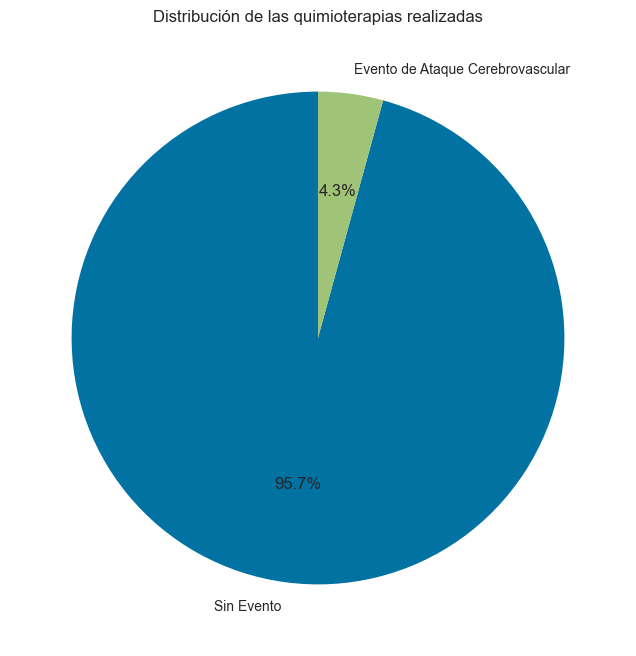

In [21]:
# REvisión de la distribución de ataque cerebrovascular
stroke_counts = dataset['stroke'].value_counts()
stroke_labels = ['Evento de Ataque Cerebrovascular' if stroke == 1 else 'Sin Evento' for stroke in stroke_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las quimioterapias realizadas')
plt.show()

## ML

Al parecer nuestro dataset se encuentra balanceado, por tanto, el balance no va a ser un problema. <br>
Nos toca definir cuál es el target, Kaggle nos dá 3 posibilidades: <br>
<ul>
    <li>Clasificación de tumores : predecir si un tumor es benigno o maligno.
    <li>Análisis de supervivencia : estimación de la tasa de supervivencia en función de diferentes características, como el tipo de tumor y el tratamiento.
    <li>Predicción de la necesidad de sguimiento : predecir la necesidad de seguimiento.
</ul>

Es un problema de clasificación con aprendizaje superivado, ya que tenemos las etiquetas, se eligió 
Vamos a iniciar con k-Nearest Neighbors y luego con Naive Bayes


### Preparación de los Datos

In [22]:
training_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

x = dataset[training_columns]
y = dataset['stroke']

X_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, random_state = 42, test_size=0.2, shuffle=True)

### K-Nearest Neighbors

0.8706720977596741


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


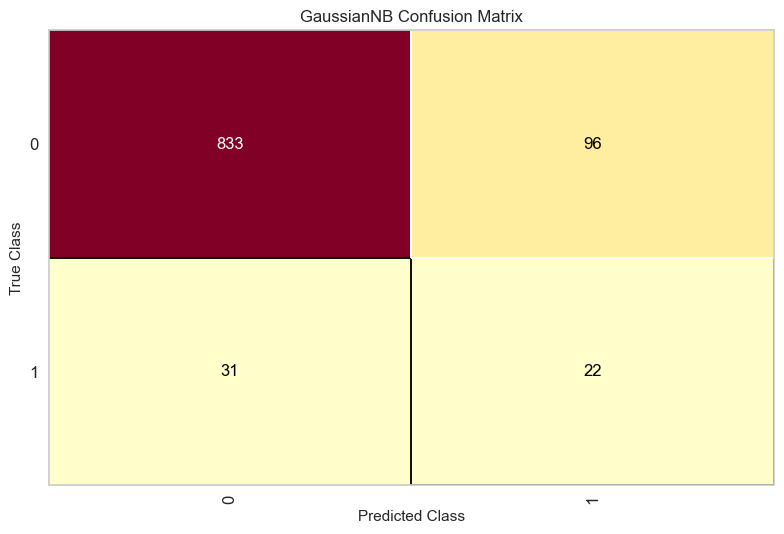

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [23]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

0.9429735234215886


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


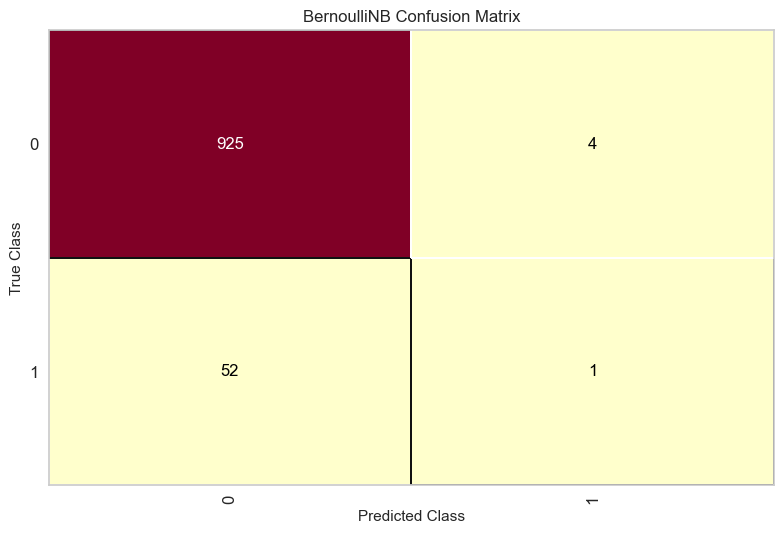

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

0.9185336048879837


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


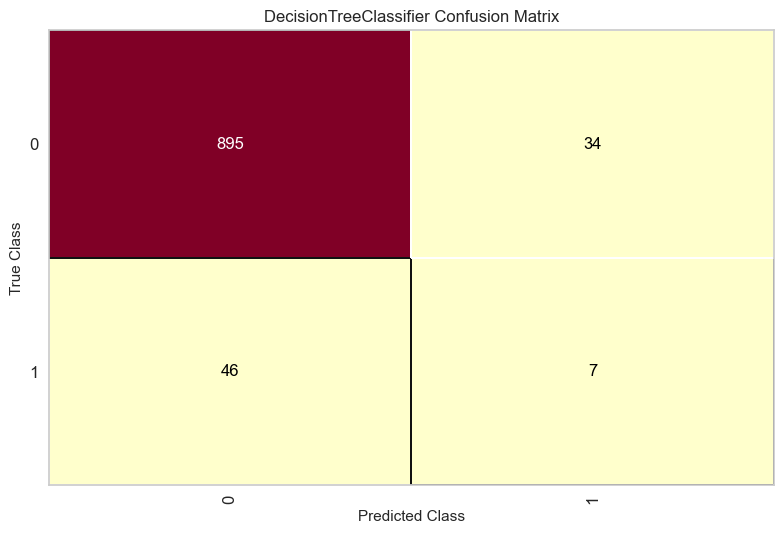

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
previsoes = tree.predict(x_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9134419551934827


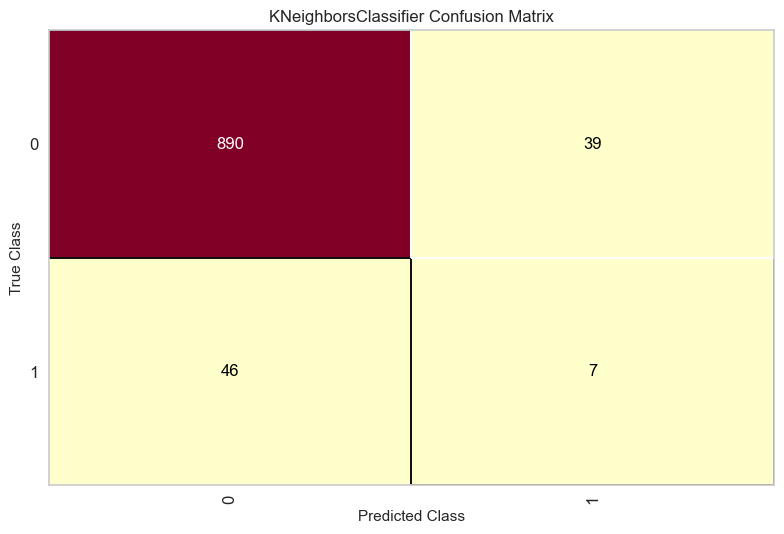

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(x_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

In [27]:
# Implementación de una red neuronal para la clasificación
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato categórico
num_classes = len(y.unique())
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo
eval_results = model.evaluate(x_test, y_test_categorical)
print(f"Pérdida: {eval_results[0]}, Precisión: {eval_results[1]}")

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8979 - loss: 1.5881 - val_accuracy: 0.9618 - val_loss: 0.1868
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9292 - loss: 0.4202 - val_accuracy: 0.9618 - val_loss: 0.2685
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9411 - loss: 0.3120 - val_accuracy: 0.9618 - val_loss: 0.2342
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9609 - loss: 0.2273 - val_accuracy: 0.9618 - val_loss: 0.2161
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9589 - loss: 0.1999 - val_accuracy: 0.9618 - val_loss: 0.1998
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9607 - loss: 0.1875 - val_accuracy: 0.9618 - val_loss: 0.1999
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9623 - loss: 0.1702 - val_accuracy: 0.9618 - val_loss: 0.1794
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9607 - loss: 0.1890 - val_accuracy: 0.9618 - val_loss

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


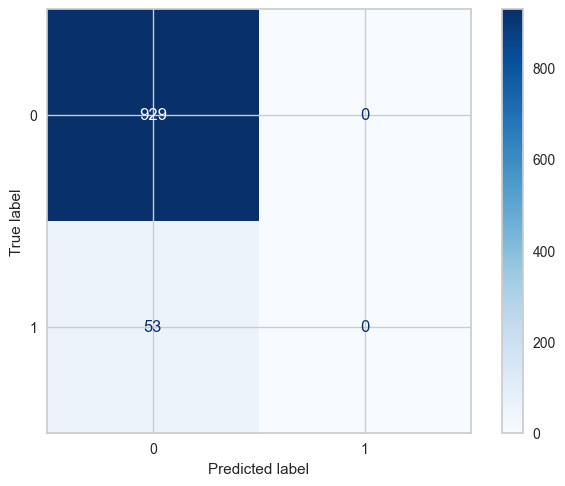

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir predicciones a clases
y_test_classes = np.argmax(y_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

In [29]:
# Dividir el dataset en personas con y sin stroke
stroke_data = dataset[dataset['stroke'] == 1]
no_stroke_data = dataset[dataset['stroke'] == 0]

# Sobre-representar los datos de stroke (multiplicar por 20)
stroke_data_overrepresented = pd.concat([stroke_data] * 20, ignore_index=True)

# Combinar los datasets
balanced_dataset = pd.concat([stroke_data_overrepresented, no_stroke_data], ignore_index=True)

# Mezclar los datos para evitar orden
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el balance
print(balanced_dataset['stroke'].value_counts())

stroke
0    4700
1    4180
Name: count, dtype: int64


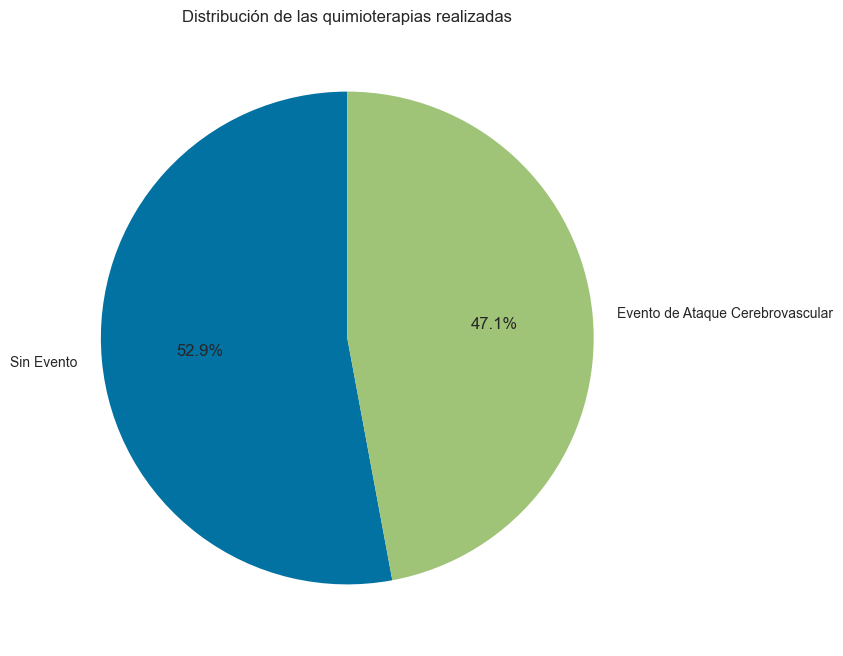

In [30]:
# REvisión de la distribución de ataque cerebrovascular
stroke_counts = balanced_dataset['stroke'].value_counts()
stroke_labels = ['Evento de Ataque Cerebrovascular' if stroke == 1 else 'Sin Evento' for stroke in stroke_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las quimioterapias realizadas')
plt.show()

In [31]:
training_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

x = balanced_dataset[training_columns]
y = balanced_dataset['stroke']

X_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, random_state = 42, test_size=0.2, shuffle=True)

0.7438063063063063


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


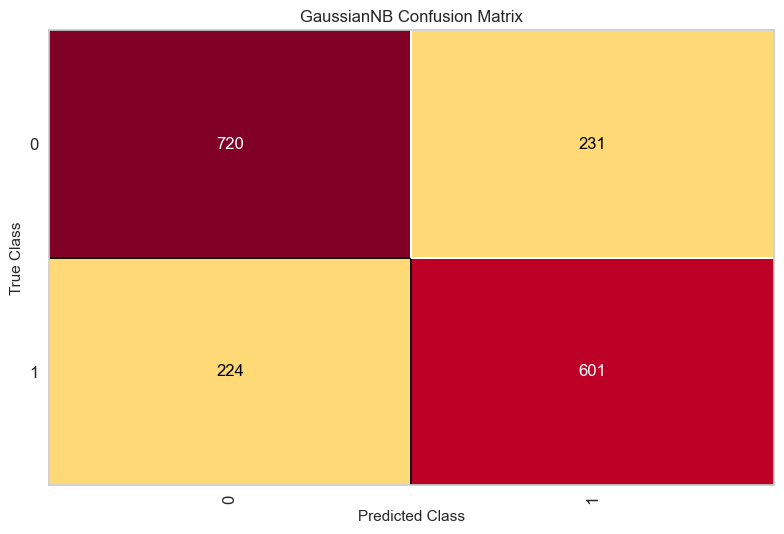

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


0.6447072072072072


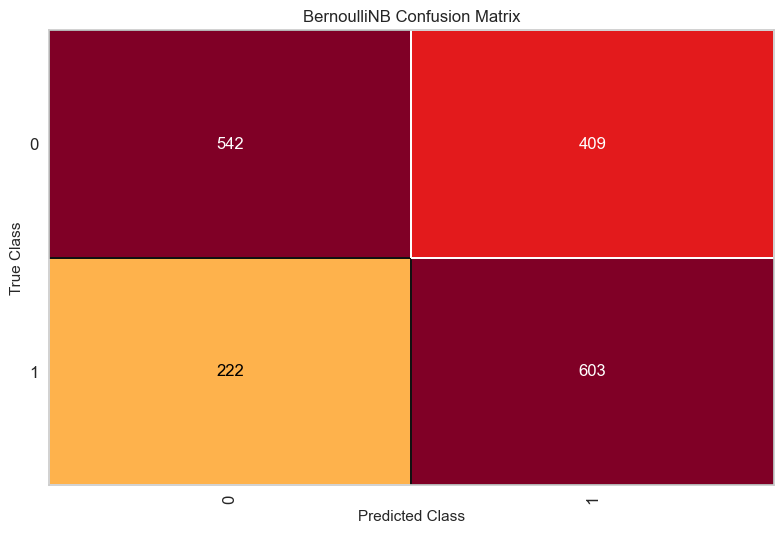

<Axes: title={'center': 'BernoulliNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9746621621621622


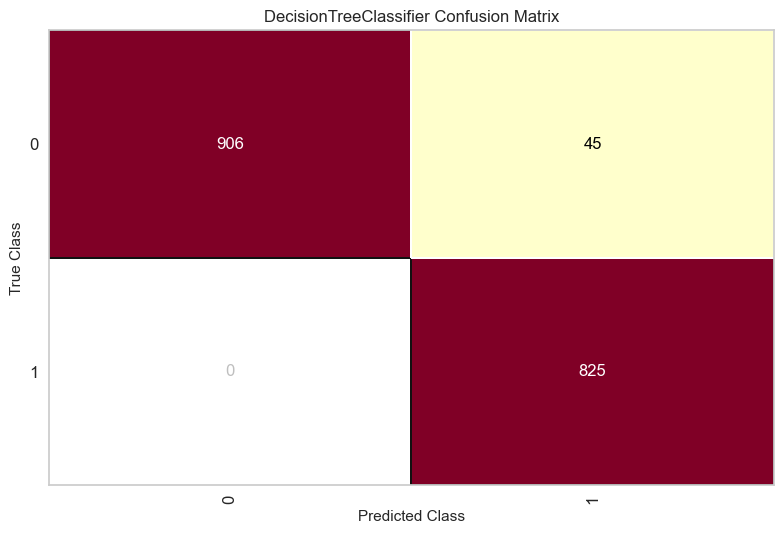

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
tree = sk.tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
previsoes = tree.predict(x_test)

cm = yb.classifier.ConfusionMatrix(tree)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9769144144144144


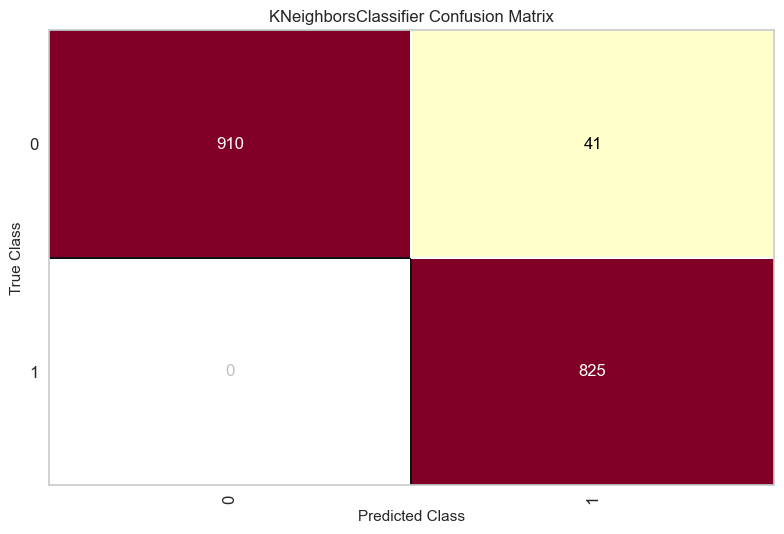

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(x_test)

cm = yb.classifier.ConfusionMatrix(knn)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

In [36]:
# Implementación de una red neuronal para la clasificación
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir las etiquetas a formato categórico
num_classes = len(y.unique())
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo
eval_results = model.evaluate(x_test, y_test_categorical)
print(f"Pérdida: {eval_results[0]}, Precisión: {eval_results[1]}")

Epoch 1/50


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5392 - loss: 4.3929 - val_accuracy: 0.6890 - val_loss: 0.5970
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6451 - loss: 0.7171 - val_accuracy: 0.7354 - val_loss: 0.6117
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6891 - loss: 0.5960 - val_accuracy: 0.7164 - val_loss: 0.5604
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7046 - loss: 0.5797 - val_accuracy: 0.7284 - val_loss: 0.5416
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7002 - loss: 0.5687 - val_accuracy: 0.7284 - val_loss: 0.5376
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7157 - loss: 0.5554 - val_accuracy: 0.7361 - val_loss: 0.5321
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7147 - loss: 0.5528 - val_accuracy: 0.7298 - val_loss: 0.5142
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7294 - loss: 0.5399 - val_accuracy: 0.7255 - val_

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


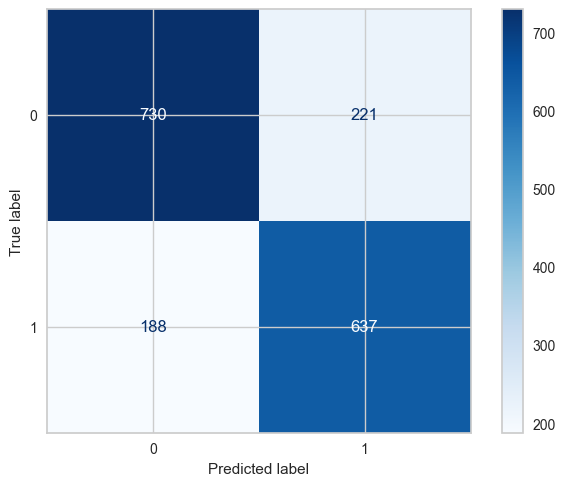

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir predicciones a clases
y_test_classes = np.argmax(y_test_categorical, axis=1)  # Convertir etiquetas reales a clases

# Crear la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='Blues')
plt.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.990990990990991


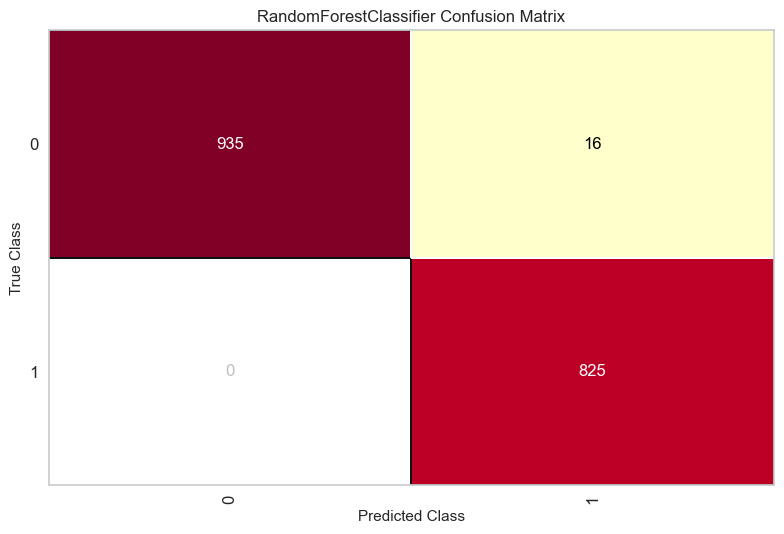

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(x_test)

cm = yb.classifier.ConfusionMatrix(rf)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7561936936936937


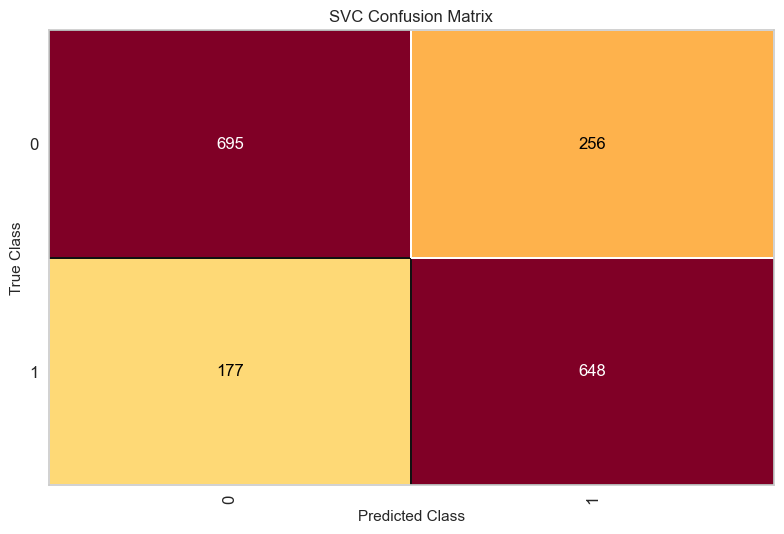

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(x_test)

cm = yb.classifier.ConfusionMatrix(svm)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

0.7809684684684685


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


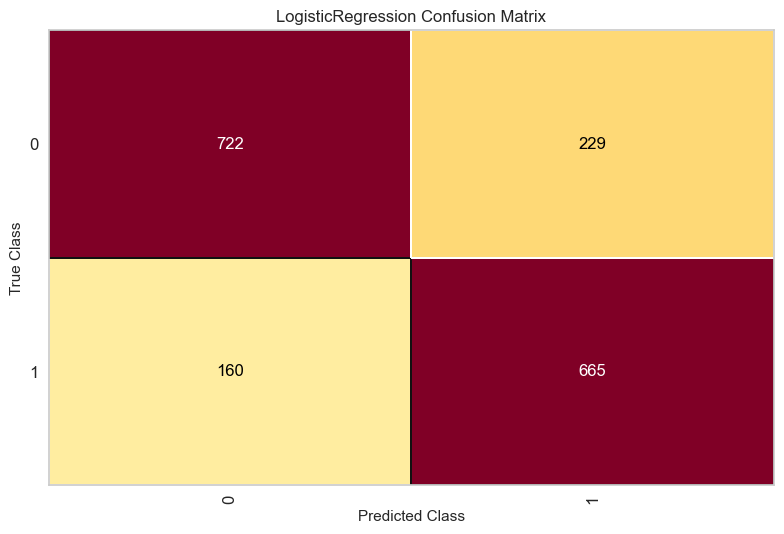

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(x_test)

cm = yb.classifier.ConfusionMatrix(logreg)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

0.9769144144144144


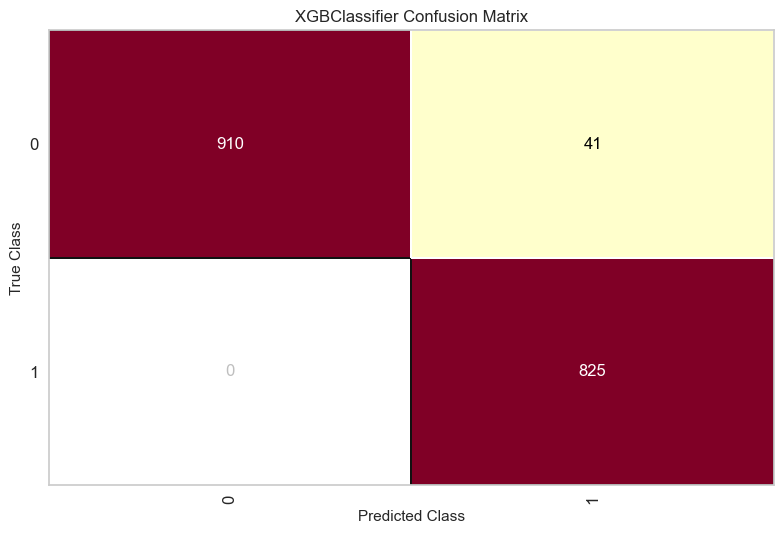

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(x_test)

cm = yb.classifier.ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

[LightGBM] [Info] Number of positive: 3355, number of negative: 3749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 7104, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472269 -> initscore=-0.111037
[LightGBM] [Info] Start training from score -0.111037
0.9566441441441441


C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


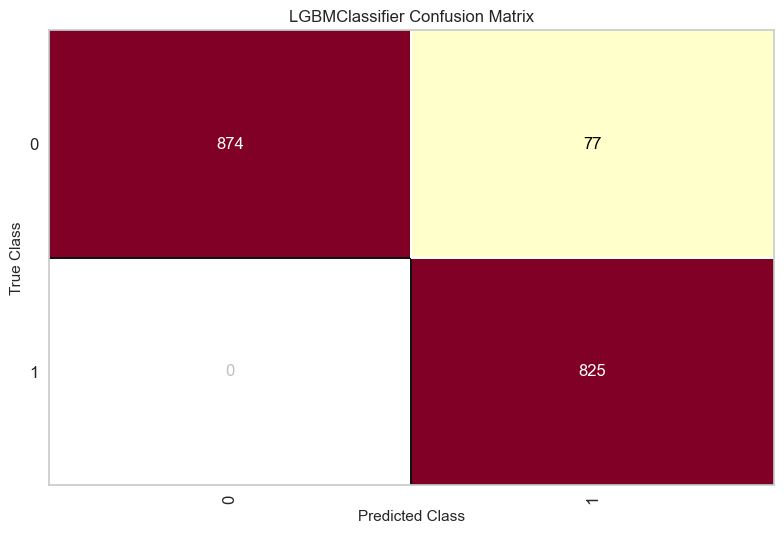

<Axes: title={'center': 'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_predictions = lgbm.predict(x_test)

cm = yb.classifier.ConfusionMatrix(lgbm)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.7815315315315315


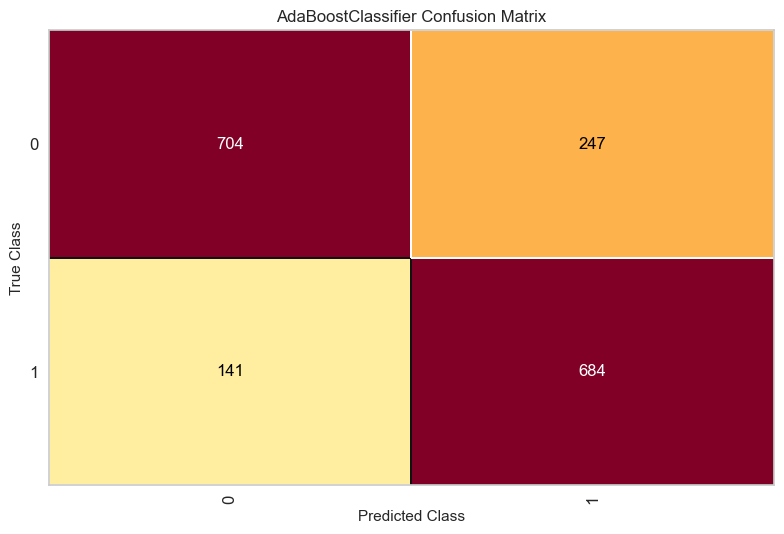

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(x_test)

cm = yb.classifier.ConfusionMatrix(adaboost)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


0.9960585585585585


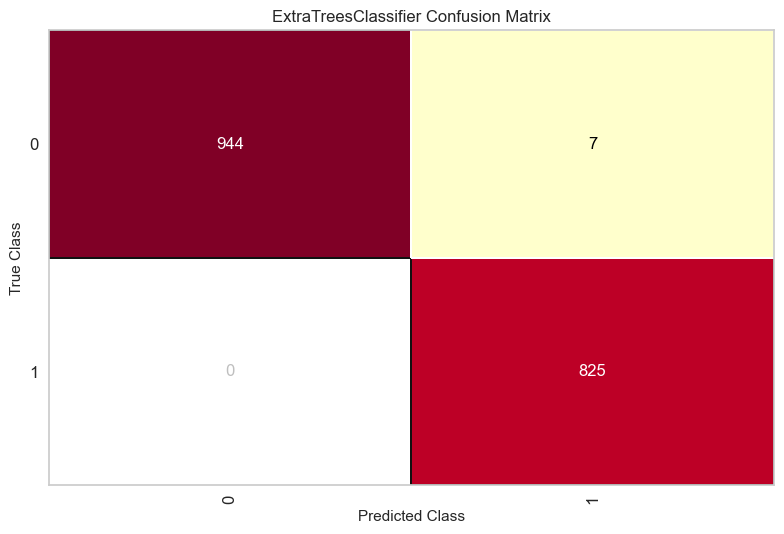

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train, y_train)
etc_predictions = etc.predict(x_test)

cm = yb.classifier.ConfusionMatrix(etc)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.9842342342342343


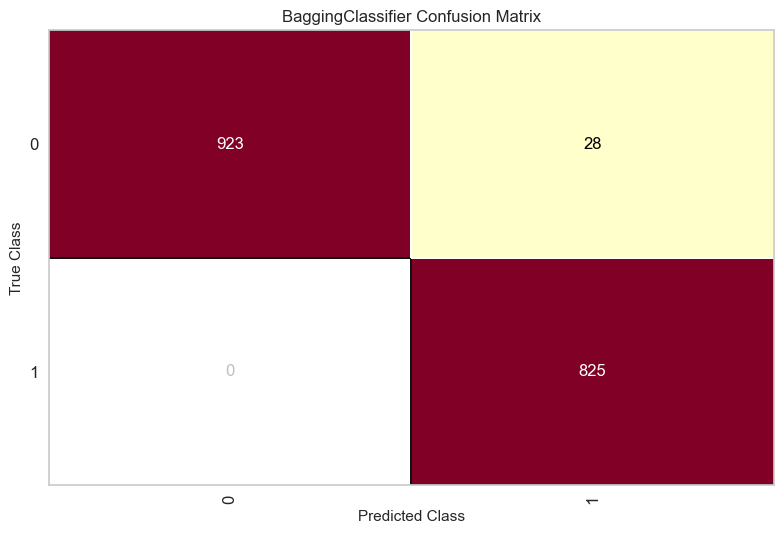

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # Importar DecisionTreeClassifier

# Crear el modelo Bagging con DecisionTreeClassifier como base
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(x_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = yb.classifier.ConfusionMatrix(bagging)
cm.fit(X_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Precisión del modelo Bagging con ETC: 0.9943693693693694


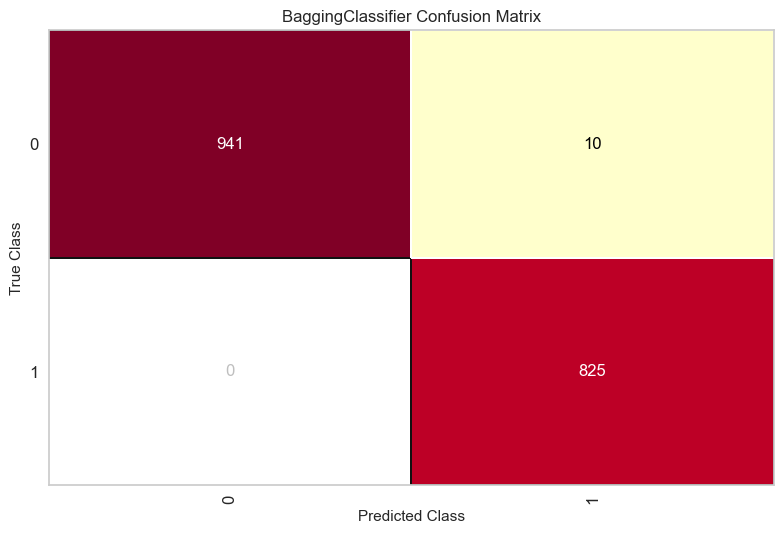

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from yellowbrick.classifier import ConfusionMatrix

# Crear el modelo Bagging con ExtraTreesClassifier como base
bagging = BaggingClassifier(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), 
                            n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(x_test)

# Visualizar la matriz de confusión con Yellowbrick
cm = ConfusionMatrix(bagging, classes=np.unique(y_train))
cm.fit(X_train, y_train)
score_bagging_etc = cm.score(x_test, y_test)
print(f"Precisión del modelo Bagging con ETC: {score_bagging_etc}")
cm.show()